In [1]:
import pandas as pd   # Importing the Pandas library for manipulating the dataframes
import numpy as np    # Importing the numpy library for numerical calculations
import warnings       # Importing the warning library to ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
cd /kaggle/input/task-1-internsavy  # Giving the path for the dataset to read the dataset

/kaggle/input/task-1-internsavy


In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")  # Reading the dataset and assing it to the variable called df

In [4]:
df   # Displaying the file which has been read 

,Serial No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# EDA

#### Creating the new attribute

##### Actually the problem given is REGRESSION but you asked me to use the CLASSIFICATION technique so I converted the problem into CLASSIFICATION problem by creating the attribue ADMISSION STATUS based on chance of admission attribute. If the chance of admission is less than 0.7 then it is 0 if greater than 0.7 it is 1
##### 0 ----> less chance of getting admission
##### 1 ----> high chance of getting admission

In [5]:
df['Admission_Status'] = df['Chance_of_Admit'].apply(lambda x: 1 if x > 0.7 else 0)  # Convert percentage values into 0s and 1s
df  # Displaying the Data Frame after converting

,Serial No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admission_Status
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,1
496,497,337,117,5,5.0,5.0,9.87,1,0.96,1
497,498,330,120,5,4.5,5.0,9.56,1,0.93,1
498,499,312,103,4,4.0,5.0,8.43,0,0.73,1


In [6]:
df.info()   # Get to know some information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
 9   Admission_Status   500 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 39.2 KB


In [7]:
df.columns  # Diaplaying the column names

Index(['Serial No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit', 'Admission_Status'],
      dtype='object')

In [8]:
# converting the data types of the columns that required
df = df.astype({"Serial No":"category","University_Rating":"category","Research":"category","Admission_Status":"category"})
df.dtypes   # Displaying the data types after converting them

Serial No            category
GRE_Score               int64
TOEFL_Score             int64
University_Rating    category
SOP                   float64
LOR                   float64
CGPA                  float64
Research             category
Chance_of_Admit       float64
Admission_Status     category
dtype: object

In [9]:
df.describe()  # Getting the summary statistics for the numerical attributes

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


In [10]:
df.duplicated().sum()

0

In [11]:
df["Admission_Status"].value_counts(normalize = True)*100

1    57.4
0    42.6
Name: Admission_Status, dtype: float64

In [12]:
import seaborn as sns               # Importing the Seaborn library for the visualization
import matplotlib.pyplot as plt     # Importing the matplotlib.pyplot library for visualization

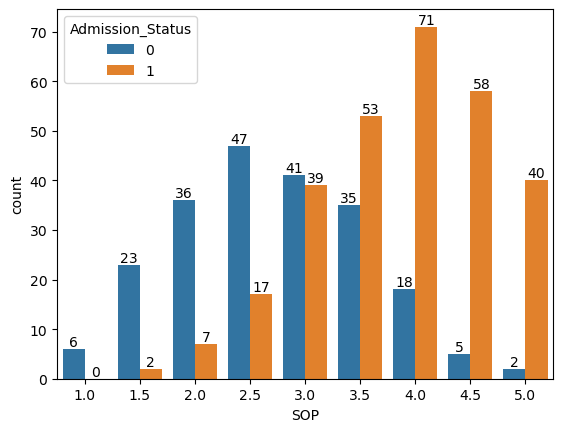

In [13]:
ax = sns.countplot(x="SOP", hue = "Admission_Status", data=df)  # creating count plot

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()   # Visualizing the  count plot

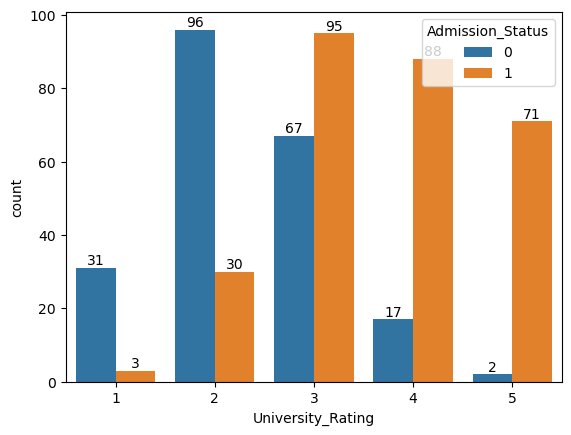

In [14]:
ax = sns.countplot(x="University_Rating", hue = "Admission_Status", data=df)  # creating count plot

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()    # Visualizing the count plot

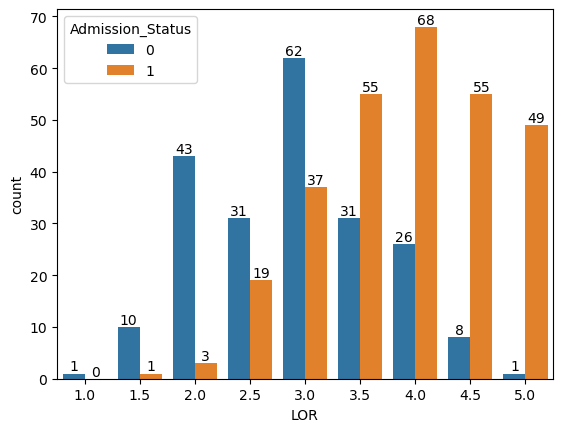

In [15]:
ax = sns.countplot(x="LOR", hue = "Admission_Status", data=df)   # creating count plot

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()     # Visualizing the Count plot

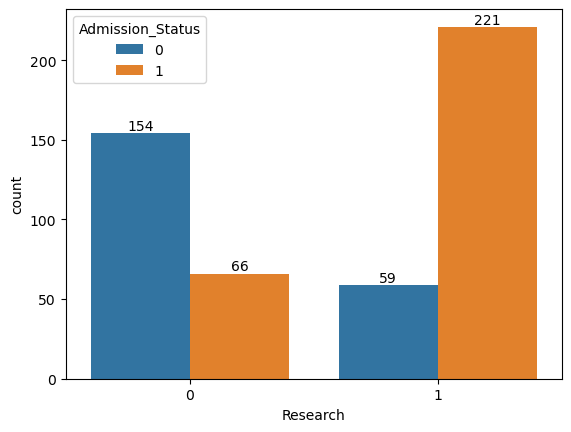

In [16]:
ax = sns.countplot(x="Research", hue = "Admission_Status", data=df)    # creating count plot

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()    # Visualizing the Count plot

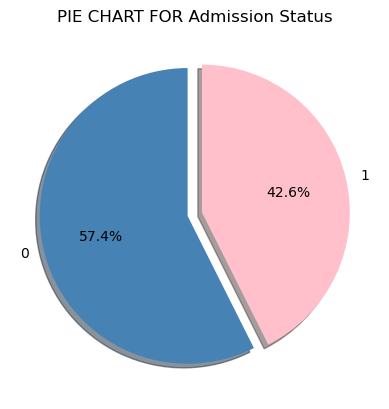

In [17]:
# Data for the pie chart
values = df["Admission_Status"].value_counts()
labels = ["0","1"]
colors = ['steelblue', 'pink']
myexplode = (0.05,0.05)

# Creating a pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode = myexplode, shadow = True)

# Add a title
plt.title('PIE CHART FOR Admission Status')

# Visualizing the pie chart
plt.show()

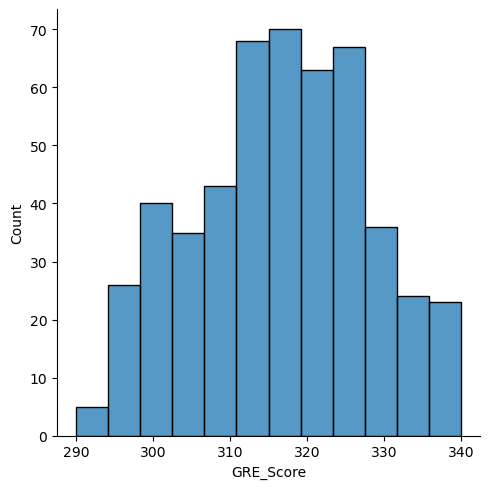

In [18]:
# Creating the distplot
sns.displot(df["GRE_Score"])

# Visualizing the Distribution plot
plt.show()

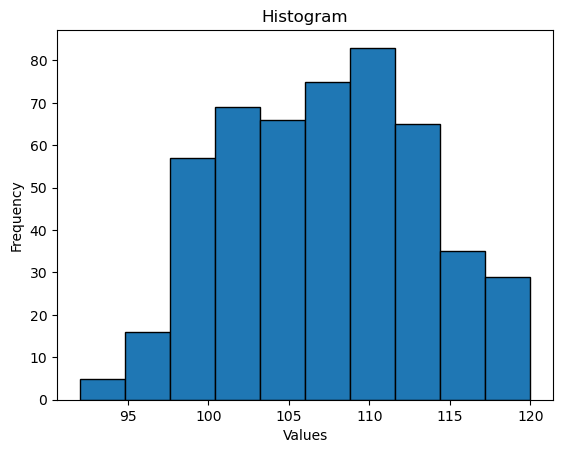

In [19]:
# Creating a histogram
plt.hist(df["TOEFL_Score"], edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Visualizing the histogram plot
plt.show()

In [20]:
for i in df:  # for loop for the uniqueness of the whole data frame
    print(i)
    print(df[i].value_counts(),"\n")

Serial No
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No, Length: 500, dtype: int64 

GRE_Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE_Score, dtype: int64 

TOEFL_Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL_

In [21]:
import missingno as msno   # Importing the missingno library for finding the missing values in a graph

<Axes: >

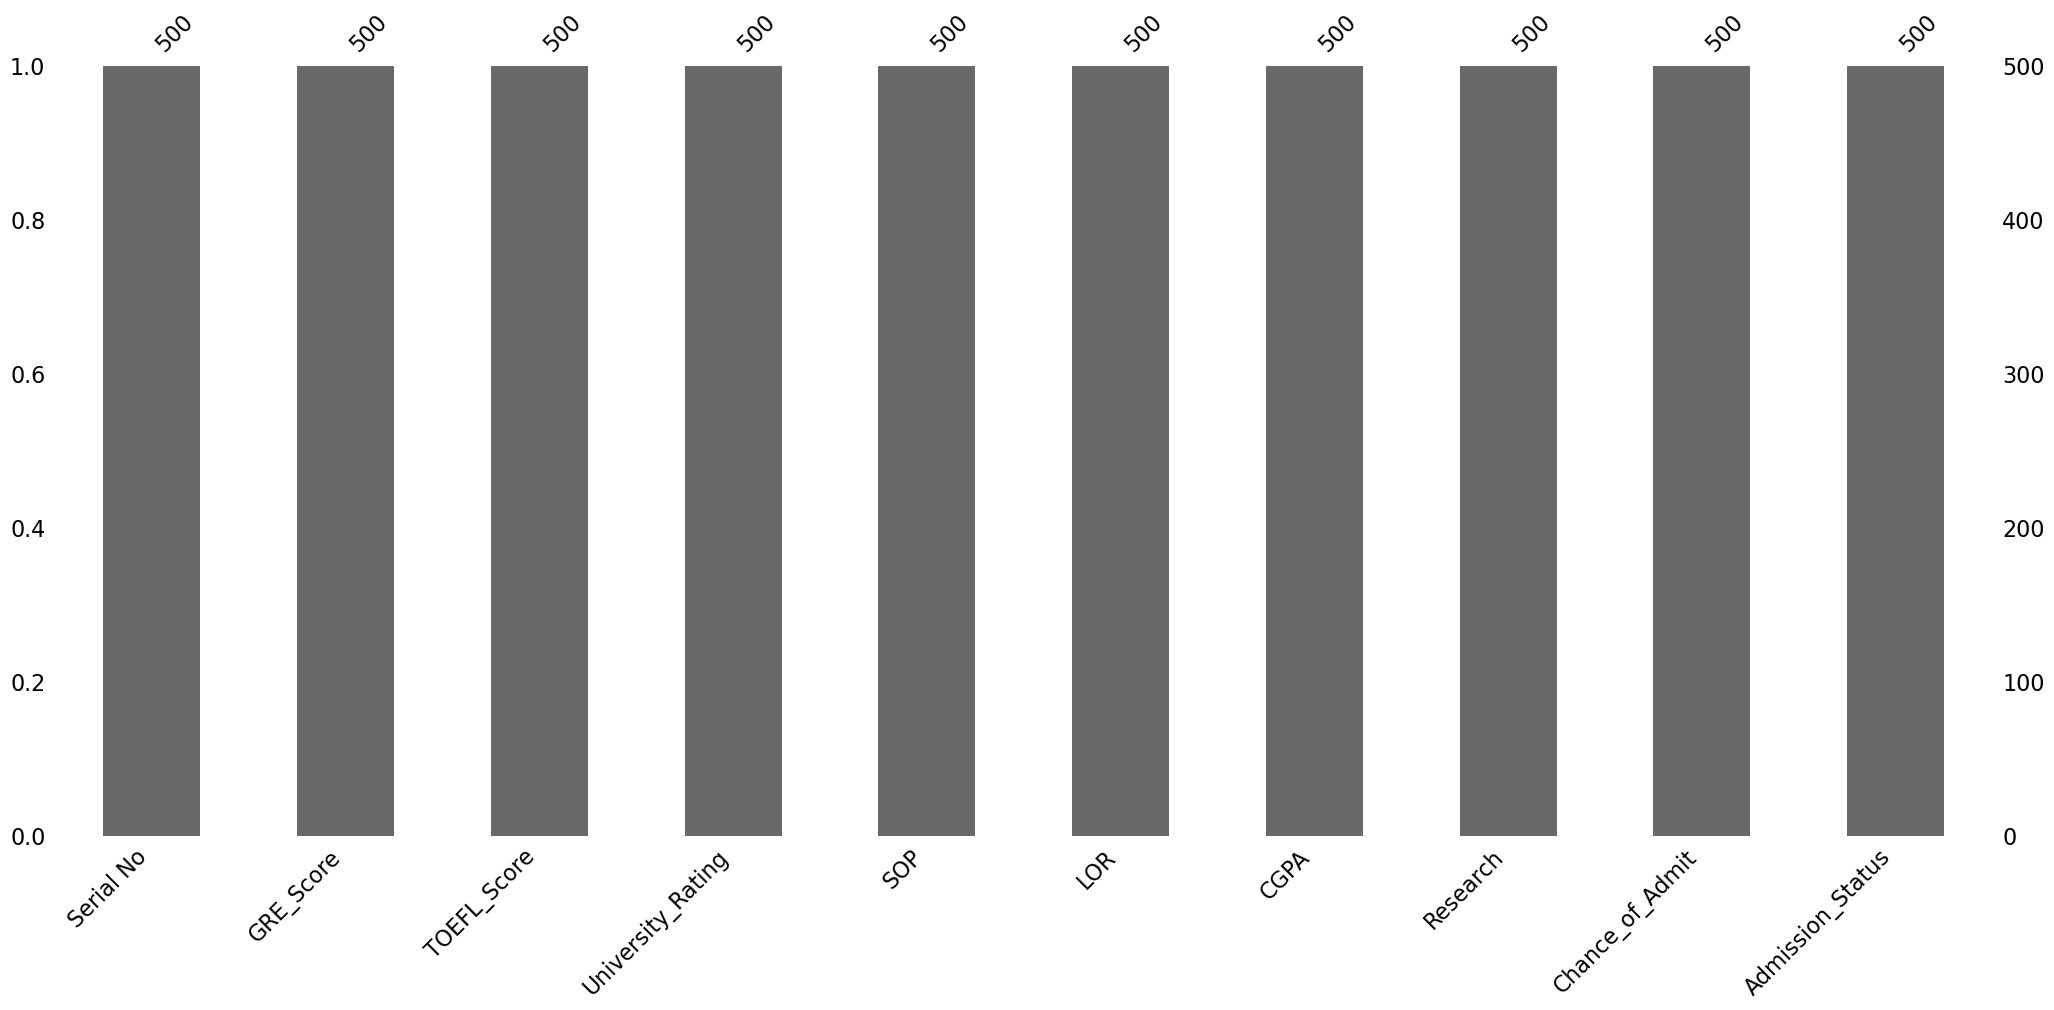

In [22]:
msno.bar(df)  # Bar plot to fing wheather any column has missing values or not

In [23]:
from scipy.stats import chi2_contingency  # Importing the chi square library to find insignificant columns

In [24]:
insignificant_columns = []  # Creating the empty list
for column in df.columns:   # for loop for to find the insignificant columns ina a dataset
    contingency_table = pd.crosstab(df[column], df["Admission_Status"])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:                          # Check if p-value is greater than 0.05
        insignificant_columns.append(column)   # Adding the insignificant column name to the empty list

In [25]:
print(insignificant_columns)    # Displaying the Insignificant columns

['Serial No']


In [26]:
df.drop(['Serial No'],axis =1, inplace = True)    # Dropping the columns which has been appeared as a insignificant columns
df.head()     # Displaying the remaining columns

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admission_Status
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


<Axes: >

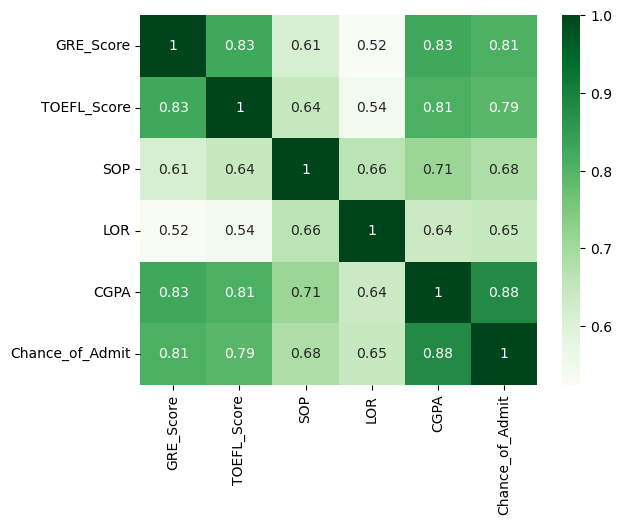

In [27]:
sns.heatmap(df.corr(), annot = True, cmap = "Greens")   # Plotting the heatmap for all the numerical columns

In [28]:
# Drooping the columns based on the correlation
df.drop(["GRE_Score","TOEFL_Score","Chance_of_Admit"],axis = 1, inplace = True)
df.head()   # Displaying the remaining columns

,University_Rating,SOP,LOR,CGPA,Research,Admission_Status
0,4,4.5,4.5,9.65,1,1
1,4,4.0,4.5,8.87,1,1
2,3,3.0,3.5,8.00,1,1
3,3,3.5,2.5,8.67,1,1
4,2,2.0,3.0,8.21,0,0


In [29]:
df.dtypes   # Checking the data types of each column

University_Rating    category
SOP                   float64
LOR                   float64
CGPA                  float64
Research             category
Admission_Status     category
dtype: object

In [30]:
df.columns  # Displaying the column names

Index(['University_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Admission_Status'],
      dtype='object')

In [31]:
# Dividing categorical columns and assigned them to the variable called cat_cols
cat_cols = ["University_Rating","Research"]
# Dividing numerical columns and assigned them to the variable called num_cols
num_cols = ["SOP","LOR","CGPA"]

In [32]:
# Dropping the Target attribute and assining the remaining columns to the variable called X and we call them as Independent attributes
X = df.drop(["Admission_Status"],axis = 1)
# Assining the target attribute to the variable called y and we call them as Dependent attribute
y = df["Admission_Status"]

In [33]:
X  # Displaying the Independent attributes

,University_Rating,SOP,LOR,CGPA,Research
0,4,4.5,4.5,9.65,1
1,4,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,3,3.5,2.5,8.67,1
4,2,2.0,3.0,8.21,0
...,...,...,...,...,...
495,5,4.5,4.0,9.02,1
496,5,5.0,5.0,9.87,1
497,5,4.5,5.0,9.56,1
498,4,4.0,5.0,8.43,0


In [34]:
pd.DataFrame(y)  # Displaying the Dependent attribute

,Admission_Status
0,1
1,1
2,1
3,1
4,0
...,...
495,1
496,1
497,1
498,1


In [35]:
# Importing the train_test_split library from sklearn.model_selections to divide the data into train and test data
from sklearn.model_selection import train_test_split
# Dividing the whole dataset into train data(70%) and test data(30%) 
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y,test_size=0.3,random_state=107)

In [36]:
print("X_train is :   ", X_train.shape)   # Displaying the shape of the X_train
print("X_val is   :   ", X_val.shape)     # Displaying the shape of the X_val
print("y_train is :   ", y_train.shape)   # Displaying the shape of the y_train
print("y_val is   :   ", y_val.shape)     # Displaying the shape of the y_val

X_train is :    (350, 5)
X_val is   :    (150, 5)
y_train is :    (350,)
y_val is   :    (150,)


In [37]:
X_train  # Displaying the X_train data

,University_Rating,SOP,LOR,CGPA,Research
68,3,3.5,4.0,9.22,1
352,2,3.0,3.5,8.06,1
397,4,5.0,4.5,9.45,1
129,5,5.0,5.0,9.35,1
103,2,4.5,4.0,8.47,0
...,...,...,...,...,...
53,4,4.0,2.5,8.10,1
7,2,3.0,4.0,7.90,0
172,4,4.0,5.0,9.13,1
286,5,4.5,4.0,9.19,1


In [38]:
pd.DataFrame(y_train)   # Displaying the y_train data

,Admission_Status
68,0
352,0
397,1
129,1
103,0
...,...
53,1
7,0
172,1
286,1


In [39]:
X_val   # Displaying the X_val data

,University_Rating,SOP,LOR,CGPA,Research
342,3,3.0,3.0,8.24,0
281,3,4.0,4.5,9.11,1
337,5,5.0,5.0,9.47,1
365,4,4.5,3.0,9.17,1
428,2,2.0,4.5,8.74,0
...,...,...,...,...,...
458,1,3.0,3.0,8.53,1
295,2,3.0,2.5,8.57,0
442,4,4.5,4.5,9.44,1
112,3,3.5,3.5,8.34,1


In [40]:
pd.DataFrame(y_val)   # Displaying the y_val data

,Admission_Status
342,0
281,1
337,1
365,1
428,0
...,...
458,0
295,0
442,1
112,0


In [41]:
y_train.value_counts(normalize = True)*100   # Finding class imbalance of the target attribute in y_train data

1    57.428571
0    42.571429
Name: Admission_Status, dtype: float64

In [42]:
y_val.value_counts(normalize = True)*100  # Finding class imbalance of the target attribute in y_val data

1    57.333333
0    42.666667
Name: Admission_Status, dtype: float64

In [43]:
X_train.isnull().sum()   # Finding the null vales in X_train data

University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [44]:
X_val.isnull().sum()    # Finding the null vales in X_val data

University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [45]:
# Importing the StandardScaler library from sklearn.preprocessing to standardize the numerical attributes
from sklearn.preprocessing import StandardScaler

In [46]:
# Assining the standardscaler model to the scaler variable
scaler = StandardScaler()
# Fitting the numerical attributes of X_train data in standardscaler model
scaler = scaler.fit(X_train[num_cols])

In [47]:
# Transforming the numerical attributes of X_train data and assining the same attaribute names to the attributes after standardizing and aasigning it to the variable called X_train_std
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
# Transforming the numerical attributes of X_val data and assining the same attaribute names to the attributes after standardizing and aasigning it to the variable called X_val_std
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns = X_val[num_cols].columns)

In [48]:
X_train_std   # Displaying the data of X_train after standardizing

,SOP,LOR,CGPA
0,0.138256,0.559721,1.085123
1,-0.350527,0.003180,-0.825785
2,1.604603,1.116262,1.464009
3,1.604603,1.672803,1.299276
4,1.115821,0.559721,-0.150378
...,...,...,...
345,0.627038,-1.109901,-0.759892
346,-0.350527,0.559721,-1.089359
347,0.627038,1.672803,0.936863
348,1.115821,0.559721,1.035703


In [49]:
X_val_std    # Displaying the data of X_val after standardizing

,SOP,LOR,CGPA
0,-0.350527,-0.553361,-0.529265
1,0.627038,1.116262,0.903916
2,1.604603,1.672803,1.496956
3,1.115821,-0.553361,1.002756
4,-1.328092,1.116262,0.294402
...,...,...,...
145,-0.350527,-0.553361,-0.051538
146,-0.350527,-1.109901,0.014355
147,1.115821,1.116262,1.447536
148,0.138256,0.003180,-0.364532


In [50]:
# creationg dummies for cat_cols from X_train and assining it to the variable called X_train_dummies
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)

In [51]:
X_train_dummies    # Displaying the X_train data after dummification

,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
68,0,1,0,0,1
352,1,0,0,0,1
397,0,0,1,0,1
129,0,0,0,1,1
103,1,0,0,0,0
...,...,...,...,...,...
53,0,0,1,0,1
7,1,0,0,0,0
172,0,0,1,0,1
286,0,0,0,1,1


In [52]:
# creationg dummies for cat_cols from X_val and assining it to the variable called X_val_dummies
X_val_dummies = pd.get_dummies(X_val[cat_cols],drop_first = True)

In [53]:
X_val_dummies  # Displaying the X_val data after dummification

,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
342,0,1,0,0,0
281,0,1,0,0,1
337,0,0,0,1,1
365,0,0,1,0,1
428,1,0,0,0,0
...,...,...,...,...,...
458,0,0,0,0,1
295,1,0,0,0,0
442,0,0,1,0,1
112,0,1,0,0,1


In [54]:
# Resetting the index to concat correctly and assining it to the variable called X_train_std
X_train_std = X_train_std.reset_index()
# Displaying the X_train_std after resetting the index
X_train_std

,index,SOP,LOR,CGPA
0,0,0.138256,0.559721,1.085123
1,1,-0.350527,0.003180,-0.825785
2,2,1.604603,1.116262,1.464009
3,3,1.604603,1.672803,1.299276
4,4,1.115821,0.559721,-0.150378
...,...,...,...,...
345,345,0.627038,-1.109901,-0.759892
346,346,-0.350527,0.559721,-1.089359
347,347,0.627038,1.672803,0.936863
348,348,1.115821,0.559721,1.035703


In [55]:
# dropping the index column  and assining it to the variable called X_train_std
X_train_std = X_train_std.drop(["index"], axis = 1)
# Displaying the X_train_std data after dropping the index column
X_train_std

,SOP,LOR,CGPA
0,0.138256,0.559721,1.085123
1,-0.350527,0.003180,-0.825785
2,1.604603,1.116262,1.464009
3,1.604603,1.672803,1.299276
4,1.115821,0.559721,-0.150378
...,...,...,...
345,0.627038,-1.109901,-0.759892
346,-0.350527,0.559721,-1.089359
347,0.627038,1.672803,0.936863
348,1.115821,0.559721,1.035703


In [56]:
# resetting the index to concat correctly and assining it to the variable called X_val_std
X_val_std = X_val_std.reset_index()
# Displaying the X_val_std after resetting the index
X_val_std

,index,SOP,LOR,CGPA
0,0,-0.350527,-0.553361,-0.529265
1,1,0.627038,1.116262,0.903916
2,2,1.604603,1.672803,1.496956
3,3,1.115821,-0.553361,1.002756
4,4,-1.328092,1.116262,0.294402
...,...,...,...,...
145,145,-0.350527,-0.553361,-0.051538
146,146,-0.350527,-1.109901,0.014355
147,147,1.115821,1.116262,1.447536
148,148,0.138256,0.003180,-0.364532


In [57]:
# dropping the index column and assining it to the variable called X_val_std
X_val_std = X_val_std.drop(["index"], axis = 1)
# Displaying the X_val_std data after dropping the index column
X_val_std

,SOP,LOR,CGPA
0,-0.350527,-0.553361,-0.529265
1,0.627038,1.116262,0.903916
2,1.604603,1.672803,1.496956
3,1.115821,-0.553361,1.002756
4,-1.328092,1.116262,0.294402
...,...,...,...
145,-0.350527,-0.553361,-0.051538
146,-0.350527,-1.109901,0.014355
147,1.115821,1.116262,1.447536
148,0.138256,0.003180,-0.364532


In [58]:
# resetting the index to concat correctly and assining it to the variable called X_train_dummies
X_train_dummies = X_train_dummies.reset_index()
# Displaying the X_train_dummies after resetting the index
X_train_dummies

,index,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
0,68,0,1,0,0,1
1,352,1,0,0,0,1
2,397,0,0,1,0,1
3,129,0,0,0,1,1
4,103,1,0,0,0,0
...,...,...,...,...,...,...
345,53,0,0,1,0,1
346,7,1,0,0,0,0
347,172,0,0,1,0,1
348,286,0,0,0,1,1


In [59]:
# dropping the index column and assining it to the variable called X_train_dummies
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)
# Displaying the X_train_dummies after resetting the index
X_train_dummies

,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
0,0,1,0,0,1
1,1,0,0,0,1
2,0,0,1,0,1
3,0,0,0,1,1
4,1,0,0,0,0
...,...,...,...,...,...
345,0,0,1,0,1
346,1,0,0,0,0
347,0,0,1,0,1
348,0,0,0,1,1


In [60]:
# resetting the index to concat correctly and assining it to the variable called X_val_dummies
X_val_dummies = X_val_dummies.reset_index()
# Displaying the X_val_dummies data after resetting the index
X_val_dummies

,index,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
0,342,0,1,0,0,0
1,281,0,1,0,0,1
2,337,0,0,0,1,1
3,365,0,0,1,0,1
4,428,1,0,0,0,0
...,...,...,...,...,...,...
145,458,0,0,0,0,1
146,295,1,0,0,0,0
147,442,0,0,1,0,1
148,112,0,1,0,0,1


In [61]:
# dropping the index column and assining it to the variable called X_val_dummies
X_val_dummies = X_val_dummies.drop(["index"], axis = 1)
# Displaying the X_val_dummies data after drooping the index attribute
X_val_dummies

,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
0,0,1,0,0,0
1,0,1,0,0,1
2,0,0,0,1,1
3,0,0,1,0,1
4,1,0,0,0,0
...,...,...,...,...,...
145,0,0,0,0,1
146,1,0,0,0,0
147,0,0,1,0,1
148,0,1,0,0,1


In [62]:
# Concating the X_train_std, X_train_dummies as final_X_train_data
final_X_train = pd.concat([X_train_std,X_train_dummies], axis = 1)

In [63]:
final_X_train  # Displaying the X_train_std, X_train_dummies data after concating them

,SOP,LOR,CGPA,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
0,0.138256,0.559721,1.085123,0,1,0,0,1
1,-0.350527,0.003180,-0.825785,1,0,0,0,1
2,1.604603,1.116262,1.464009,0,0,1,0,1
3,1.604603,1.672803,1.299276,0,0,0,1,1
4,1.115821,0.559721,-0.150378,1,0,0,0,0
...,...,...,...,...,...,...,...,...
345,0.627038,-1.109901,-0.759892,0,0,1,0,1
346,-0.350527,0.559721,-1.089359,1,0,0,0,0
347,0.627038,1.672803,0.936863,0,0,1,0,1
348,1.115821,0.559721,1.035703,0,0,0,1,1


In [64]:
# Concating the X_test_std, X_test_dummies as final_X_test_data
final_X_val = pd.concat([X_val_std,X_val_dummies], axis = 1)

In [65]:
final_X_val  # Displaying the X_val_std, X_val_dummies data after concating them

,SOP,LOR,CGPA,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
0,-0.350527,-0.553361,-0.529265,0,1,0,0,0
1,0.627038,1.116262,0.903916,0,1,0,0,1
2,1.604603,1.672803,1.496956,0,0,0,1,1
3,1.115821,-0.553361,1.002756,0,0,1,0,1
4,-1.328092,1.116262,0.294402,1,0,0,0,0
...,...,...,...,...,...,...,...,...
145,-0.350527,-0.553361,-0.051538,0,0,0,0,1
146,-0.350527,-1.109901,0.014355,1,0,0,0,0
147,1.115821,1.116262,1.447536,0,0,1,0,1
148,0.138256,0.003180,-0.364532,0,1,0,0,1


# MODEL BUILDING

## LOGISTIC REGRESSION

In [66]:
# Importing the Logestic Regression model from sklearn.linear_model to build the logestic regression
from sklearn.linear_model import LogisticRegression
# Importing the GridsearchCV from sklearn.model_selection library
from sklearn.model_selection import GridSearchCV

In [67]:
# Assining the logistic model to a variable called log_reg
log_reg = LogisticRegression(random_state = 10)

In [68]:
# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

In [69]:
# Define the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

In [70]:
# Fit GridSearchCV object to data
grid_search.fit(final_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [71]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [72]:
# Assining the logistic model with hyperparameter to a variable called log_reg
log_reg = LogisticRegression(C = 0.1, penalty = "l1", solver = "saga")
# Fitting the model to the final_X_train amd y_train data and assining it to the log_reg
log_reg = log_reg.fit(final_X_train,y_train)

In [73]:
# predicting the y value for the train data
log_reg_y_train_preds = log_reg.predict(final_X_train)
# Displaying the first 30 predictions of train data
log_reg_y_train_preds[0:30]

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0])

In [74]:
# predicting the y value for the test data
log_reg_y_val_preds = log_reg.predict(final_X_val)
# Displaying the first 30 predictions of test data
log_reg_y_val_preds[0:30]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [75]:
# import libraries of confusion_matrix and accuracy and recall, f1_score, 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score, f1_score

In [76]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,log_reg_y_train_preds)
# Displaying the confusion_matrix for train actuals v/s train predictions
confusionmatrix

array([[120,  29],
       [ 22, 179]])

In [77]:
# finding the confusion_matrix for y_val_actuals and y_val_predicts
confusionmatrix = confusion_matrix(y_val,log_reg_y_val_preds)
# Displaying the confusion_matrix for val actuals v/s val predictions
confusionmatrix

array([[47, 17],
       [10, 76]])

In [78]:
# finding the accuracy for y_train_actuals and y_train_predicts
log_reg_accuracy_train = accuracy_score(y_train,log_reg_y_train_preds)
log_reg_accuracy_train

0.8542857142857143

In [79]:
# finding the accuracy for y_val_actuals and y_val_predicts
log_reg_accuracy_val = accuracy_score(y_val,log_reg_y_val_preds)
log_reg_accuracy_val

0.82

In [80]:
# finding the f1_score for y_train_actuals and y_train_predicts
log_reg_f1_score_train = f1_score(y_train,log_reg_y_train_preds,average='micro')
log_reg_f1_score_train

0.8542857142857143

In [81]:
# finding the accuracy for y_val_actuals and y_val_predicts
log_reg_f1_score_val = f1_score(y_val,log_reg_y_val_preds,average='micro')
log_reg_f1_score_val

0.82

In [82]:
# finding the recall_score for y_train_actuals and y_train_predicts
log_reg_recall_train = recall_score(y_train,log_reg_y_train_preds, average = "micro")
log_reg_recall_train

0.8542857142857143

In [83]:
# finding the recall_score for y_val_actuals and y_val_predicts
log_reg_recall_val = recall_score(y_val,log_reg_y_val_preds, average = "micro")
log_reg_recall_val

0.82

## SVM

In [84]:
# Importing the Support Vector Classifier from sklearn.svm
from sklearn.svm import SVC

In [85]:
# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],   # Margin
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}

In [86]:
# Create the SVM model
svm_model = SVC(random_state = 10)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV object to the data
grid_search.fit(final_X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(random_state=10),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']})

In [87]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [88]:
# model building by SVM algorithm
svm_model = SVC(kernel="linear", C = 0.1, gamma = 0.1)
# Fitting the final_X_train and y_train data in svm_model and assining it to the variable called svm_model
svm_model = svm_model.fit(final_X_train,y_train)

In [89]:
# predicting the y value for the train data
svm_model_y_train_preds = svm_model.predict(final_X_train)
# Displaying the first 30 predictions of train data
svm_model_y_train_preds[0:30]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0])

In [90]:
# predicting the y value for the test data
svm_model_y_val_preds = svm_model.predict(final_X_val)
# Displaying the first 30 predictions of val data
svm_model_y_val_preds[0:30]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1])

In [91]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,svm_model_y_train_preds)
# Displaying the confusion matrix for train_actuals vs train_predictions
confusionmatrix

array([[125,  24],
       [ 26, 175]])

In [92]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,svm_model_y_val_preds)
# Displaying the confusion matrix for test_actuals vs test_predictions
confusionmatrix

array([[49, 15],
       [ 9, 77]])

In [93]:
# finding the accuracy for y_train_actuals and y_train_predicts
svm_accuracy_train = accuracy_score(y_train,svm_model_y_train_preds)
# Displaying the accuracy for train_actuals vs train_predictions
svm_accuracy_train

0.8571428571428571

In [94]:
# finding the accuracy for y_test_actuals and y_test_predicts
svm_accuracy_val = accuracy_score(y_val,svm_model_y_val_preds)
# Displaying the accuracy for test_actuals vs test_predictions
svm_accuracy_val

0.84

## XG_BOOST

In [95]:
# Importing the XGB from XGBOOST library for model building
import xgboost as xgb
# Importing the XGBClassifier from XGBOOST library
from xgboost import XGBClassifier

In [96]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [97]:
# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(final_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [98]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


In [99]:
# Creating a model xgbclassifier with some hyperparameters and assining it to the variable called xg_boost
xg_boost = XGBClassifier(learning_rate = 0.01, max_depth = 4, n_estimators = 300)
# Fitting the final_X_train and y_train data in xgboost model and assining it to the xg_boost
xg_boost = xg_boost.fit(final_X_train,y_train)

In [100]:
# predicting the y value for the train data
xg_boost_model_y_train_preds = xg_boost.predict(final_X_train)
# Displayining the first 30 prediction of train data
xg_boost_model_y_train_preds[0:30]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0])

In [101]:
# predicting the y value for the test data
xg_boost_model_y_val_preds = xg_boost.predict(final_X_val)
# Displaying the first 30 predictions of the test data
xg_boost_model_y_val_preds[0:30]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1])

In [102]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,xg_boost_model_y_train_preds)
# Displaying the confusion matrix of train_actuals v/s train_predictions
confusionmatrix

array([[127,  22],
       [ 15, 186]])

In [103]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,xg_boost_model_y_val_preds)
# Displaying the confusion matrix of test_actuals v/s test_predictions
confusionmatrix

array([[49, 15],
       [ 8, 78]])

In [104]:
# finding the accuracy for y_train_actuals and y_train_predicts
xg_accuracy_train = accuracy_score(y_train,xg_boost_model_y_train_preds)
# Displaying the accuracy of train_actuals and train_predictions
xg_accuracy_train

0.8942857142857142

In [105]:
# finding the accuracy for y_train_actuals and y_train_predicts
xg_accuracy_val = accuracy_score(y_val,xg_boost_model_y_val_preds)
# Displaying the accuracy of test_actuals and test_predictions
xg_accuracy_val

0.8466666666666667

In [106]:
# Create a dictionary with the accuracies and column names
data = {
    'Model': ['log_reg_accuracy_train', 'log_reg_accuracy_val', 'svm_accuracy_train', 'svm_accuracy_val', 'xg_accuracy_train', 'xg_accuracy_val'],
    'Accuracy': [log_reg_accuracy_train, log_reg_accuracy_val, svm_accuracy_train, svm_accuracy_val, xg_accuracy_train, xg_accuracy_val]
}

# Create a dataframe
accuracies = pd.DataFrame(data)

print("********** ACCURACIES OF ALL MODELS **********")
accuracies

********** ACCURACIES OF ALL MODELS **********


,Model,Accuracy
0,log_reg_accuracy_train,0.854286
1,log_reg_accuracy_val,0.820000
2,svm_accuracy_train,0.857143
3,svm_accuracy_val,0.840000
4,xg_accuracy_train,0.894286
5,xg_accuracy_val,0.846667
